In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
webpage = requests.get('https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html')
soup=BeautifulSoup(webpage.content,"html.parser")
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

We found a website that has over 1700 reviews of chocolate bars from all around the world. It’s displayed in the web browser on this page. We used BeautifulSoup to transform this webpage into a DataFrame that we can manipulate and analyze.

In [7]:
all_ratings=soup.find_all(attrs={'class': 'Rating'})
print(all_ratings)

[<td class="Rating">Rating</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">2.75</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">3.75</td>, <td class="Rating">4</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.25</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.25</td>, <td class="Rating">4</td>, <td class="Rating">3.25</td>, <td class="Rating">3.5</td>, <td class="Rating">4</td>, <td class="Rating">3.5</td>, <td class="Rating">3.75</td>, <td class="Rating">3.75</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3.25</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3</td>, <td class="Rating">3.75</td>, <td class

The rating scale is from 1-5, as described in this review guide. A 1 is “unpleasant” chocolate, while a 5 is a bar that transcends “beyond the ordinary limits”.

In [8]:
ratings=[]

for i in all_ratings:
  try:
    r=i.get_text()
    ratings.append(float(r))
  except ValueError:
    pass

print(ratings)

[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0, 2.75, 3.0, 3.25, 3.75, 2.75, 3.0, 3.25, 4.0, 3.25, 3.5, 4.0, 3.5, 3.75, 3.75, 3.75, 2.75, 3.25, 3.5, 3.5, 2.75, 3.0, 3.0, 3.75, 2.75, 2.75, 2.75, 2.75, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 2.75, 3.0, 2.5, 2.5, 2.75, 2.5, 3.0, 3.25, 3.0, 3.25, 4.0, 3.75, 4.0, 3.0, 3.0, 2.75, 3.5, 3.0, 3.75, 3.0, 2.75, 2.75, 3.0, 3.25, 3.5, 3.0, 3.25, 3.25, 3.25, 3.25, 3.5, 3.75, 4.0, 4.0, 5.0, 3.0, 3.0, 3.5, 3.75, 4.0, 3.5, 3.5, 5.0, 4.0, 3.25, 2.75, 3.75, 3.75, 4.0, 3.0, 3.5, 3.0, 2.5, 2.75, 3.0, 3.5, 3.75, 3.5, 3.25, 3.25, 3.5, 3.75, 3.5, 4.0, 4.0, 3.75, 3.25, 3.25, 3.5, 3.5, 3.75, 3.5, 3.75, 4.0, 2.75, 3.25, 3.5, 3.25, 3.75, 4.0, 2.75, 1.75, 3.75, 3.25, 3.25, 3.5, 2.5, 2.75, 1.75, 3.0, 3.0, 3.25, 3.75, 2.75, 3.75, 3.75, 3.75, 3.75, 2.5, 3.0, 3.25, 3.5, 3.0, 2.5, 2.5, 2.75, 3.5, 3.5, 4.0, 3.25, 3.5, 3.75, 2.75, 3.5, 3.75, 3.25, 3.0, 3.25, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.5, 3.5, 3.25, 3.5, 2.75, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.75, 2.

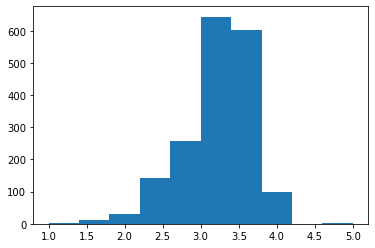

In [12]:
plt.hist(ratings)
plt.show()

Most chocolates are rated between 3.0 and 3.5.

In [20]:
Company=soup.find_all(attrs={'class': 'Company'})[1:]
Company_list=[]
for i in Company:
  Company_list.append(i.get_text())

In [21]:
df=pd.DataFrame({'Company': Company_list, 'Rating': ratings})
print(df.head())

    Company  Rating
0  A. Morin    3.75
1  A. Morin    2.75
2  A. Morin    3.00
3  A. Morin    3.50
4  A. Morin    3.50


In [27]:
avg_rating=df.groupby('Company').Rating.mean()
top_ten=avg_rating.nlargest(10)
print(top_ten)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


This is a list of top ten companies with the highest average chocolate ratings.

In [25]:
Cocoa=soup.find_all(attrs={'class': 'CocoaPercent'})[1:]

Cocoa_percent=[]
for i in Cocoa:
  i2=int(float(i.get_text().strip('%')))
  Cocoa_percent.append(i2)
print(Cocoa_percent)

[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 63, 70, 63, 70, 70, 60, 80, 88, 72, 55, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 70, 70, 70, 70, 60, 60, 60, 60, 60, 60, 60, 80, 60, 60, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 85, 85, 72, 73, 64, 66, 75, 63, 70, 68, 70, 70, 75, 70, 70, 70, 70, 70, 70, 70, 63, 70, 66, 75, 85, 50, 75, 60, 75, 75, 75, 72, 75, 75, 70, 70, 73, 70, 70, 70, 70, 70, 70, 70, 70, 70, 73, 70, 68, 70, 70, 70, 70, 75, 70, 75, 72, 72, 72, 72, 100, 72, 72, 72, 72, 75, 72, 72, 80, 75, 72, 72, 72, 68, 72, 70, 77, 75, 70, 80, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 80, 65, 70, 65, 73, 72, 80, 70, 70, 90, 64, 64, 64, 71, 70, 70, 70, 83, 78, 83, 74, 74, 74, 73, 72, 72, 55, 64, 88, 72, 72, 70, 74, 64, 72, 76, 76, 78, 86, 72, 75, 70, 65, 70, 78, 75, 65, 75, 65, 71, 75, 68, 70, 70, 70, 70, 70, 82, 72, 82, 75, 75, 75, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 100, 75, 75, 77, 1

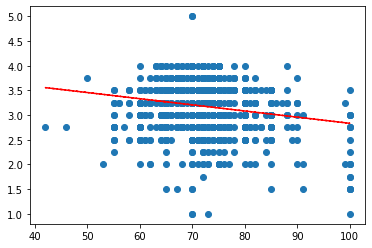

In [26]:
df2=pd.DataFrame({'Company': Company_list, 'Rating': ratings, 'CocoaPercentage': Cocoa_percent})
plt.scatter(df2.CocoaPercentage, df2.Rating)
z = np.polyfit(df2.CocoaPercentage, df2.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df2.CocoaPercentage, line_function(df2.CocoaPercentage), "r--")

plt.show()


This is a scatterplot of cocoa percentages and ratings. Higher cocoa percentages don't guarantee higher ratings!